# Probability Questions 0 (from your excellent TA Morris)

1. How does the estimation procedure for finding the optimal value of the parameter(s) of a data model given data work?

2. What are good working definitions for the likelihood and prior?

*A function of the parameter $\theta$ of a data model $f_\theta(x_i)$ which defines the value of $\prod_{i=1}^n f_\theta(x_i)$ the (joint) density (or probability) for the observed continuous (or discrete) data $x$ at the value $\theta$.*

*A prior is our beliefs about the possible values of parameters, most likely expressed as a density or probability mass function* (since this provides a most expeditious language to express these beliefs).*

<!--
    1. The terms "data" and "parameters" or "model" might be useful in the likelihood definition
    2. The terms "probability" or "belief" might be useful in the prior definition
-->
3. What does introducing a prior mean in terms of choosing a model and its parameters?

*Nothing: the data model and the experiment together dictate the parameters of interest; ny prior beliefs about the parameters is then expressed; then data is collected and the posterior updated; this encodes our updated beliefs from which posterior belief statements may be made.*

4. What is "certainty" or "level of belief" in how do you express it?

# Probability Questions 1

---

1. Estimate $\Pr(a \leq X \leq b)$ for $X \sim \textrm{beta}(\alpha,\beta)$ by sampling from a beta distribution
2. Express this statement as an expectation with $f(x)$ the beta density in question


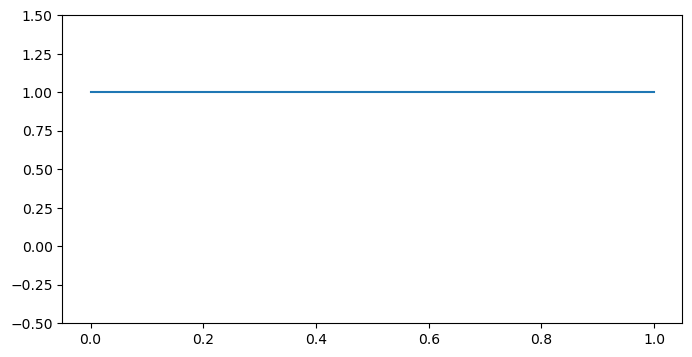

In [ ]:
from scipy import stats
import numpy as np; import matplotlib.pyplot as plt

alpha,beta = 1,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

plt.figure(figsize=(8,4)); plt.ylim([-0.5,1.5])
plt.plot(parameter_domain, prior.pdf(parameter_domain));

In [ ]:
prior.cdf(.2)

0.2

In [ ]:
m = 10000
(prior.rvs(m)<0.2).mean()


0.02

## Monte Carlo Integration
### All Bayesian estimates are just Monte Carlo Integration...

$$
\Large
\begin{align*}
\Pr(a\leq X\leq b)  {} = & \int_a^b f(x) dx \\
{} = & \int 1_{[a,b]}(x) f(x) dx = \mathrm{I\!E}[1_{[a,b]}(x_i)]\\
& \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\approx \frac{1}{n} \sum_{i=1}^n 1_{[a,b]}(x_i)
\end{align*}
$$


0.313 0.014663935351739656 0.32157197000000004


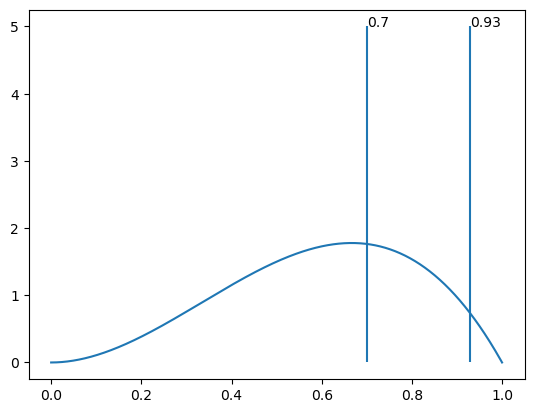

In [ ]:
# This is the (reorganized) code I produced throughout the lecture

alpha,beta = 3,2 # arbitrary
a,b = .7,.93  # arbitrary
my_beta = stats.beta(alpha,beta)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m)

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
print(in_interval.mean(),  # an average!
      # so it has a standard error...
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


# Diversion 1: Likelihoods

---


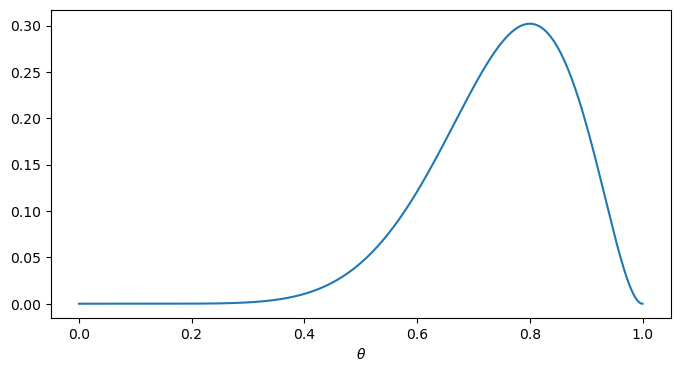

In [ ]:
n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda theta: stats.binom(n=n,p=theta).pmf(x)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, likelihood(parameter_domain));

# Diversion 2: Posteriors

---

$$
\Large
\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
\end{align*}
$$

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**


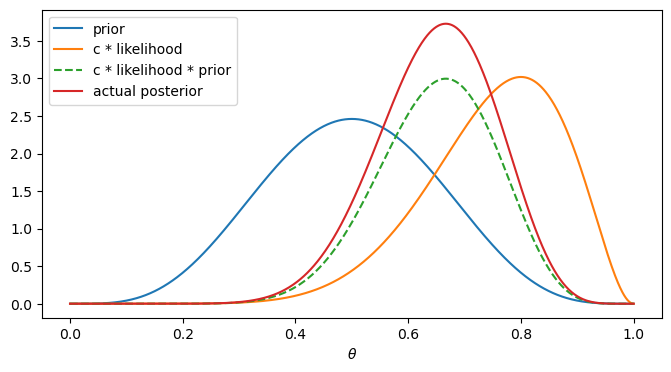

In [ ]:
plt.figure(figsize=(8,4))

alpha,beta = 5,5; parameter_domain = np.linspace(0,1,1001)
prior = stats.beta(a=alpha,b=beta)

plt.plot(parameter_domain, prior.pdf(parameter_domain),
         label='prior')

n,x = 10,8  # p_=0.75; stats.binom(n=n, p=p_).rvs()
likelihood = lambda p: stats.binom(n,p=p).pmf(x)

c = 10
plt.plot(parameter_domain, c*likelihood(parameter_domain),
         label='c * likelihood')
plt.plot(parameter_domain,
         c*likelihood(parameter_domain)*prior.pdf(parameter_domain),
         label='c * likelihood * prior', linestyle="--")

posterior = stats.beta(a=alpha+x,b=beta+n-x)

plt.plot(parameter_domain, posterior.pdf(parameter_domain),
         label='actual posterior')

plt.legend(); plt.xlabel('$\\theta$');

# Probability Questions 2

---

1. Estimate $\Pr(a \leq \theta \leq b | x)$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ based on sampling
2. What values for $a$ and $b$ solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$?
3. What is your best guess of the values for $a$ and $b$ that solve $\Pr(a \leq \theta \leq b | x) = 0.95$ for $\theta \sim \textrm{beta}(\alpha+x,\beta+n-x)$ if you only have a sample from the beta distribution?


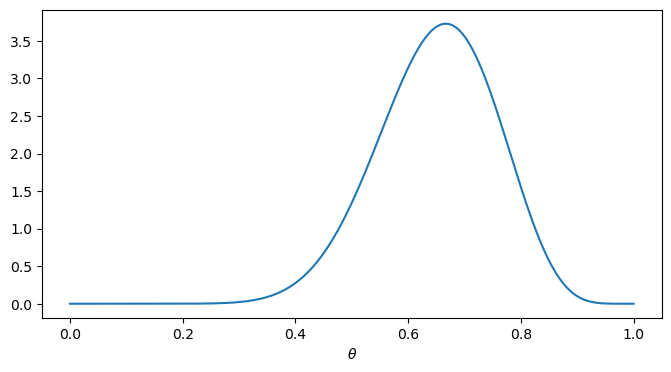

In [ ]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
posterior = stats.beta(a=alpha+x, b=beta+n-x)
plt.plot(parameter_domain, posterior.pdf(parameter_domain));


In [ ]:
# Same (reorganized) code I produced throughout the lecture
# with the following change

#alpha,beta = 3,2 # arbitrary
#a,b = .7,.93  # arbitrary
#my_beta = stats.beta(alpha,beta)
n,x = 10,8
my_beta = stats.beta(alpha+x,beta+n-x)
a,b = my_beta.ppf(.025),my_beta.ppf(.975)

u_grid = np.linspace(0,1,1001)
plt.plot(u_grid, my_beta.pdf(u_grid))
plt.vlines([a,b],0,5)
for x,y,s in zip([a,b],[5,5],[str(a),str(b)]):
    plt.text(x,y,s)

m = 1000  # Monte Carlo samples
x = my_beta.rvs(m)

in_interval = (x >= a) & (x <= b)  # 0/1 outcomes
print(in_interval.mean(),
      in_interval.std()/m**0.5,  # m not n!!!
      my_beta.cdf(b)-my_beta.cdf(a))


In [ ]:
posterior_m = posterior.rvs(m)
sorted(posterior_m)[int(m/40)], sorted(posterior_m)[-int(m/40)]
# my_beta.ppf(.025),my_beta.ppf(.975)  # truth

(0.43876120355281634, 0.8383837760707079)

## Bayesian Credible Interval
$$\Large
\begin{align*}
\underset{\text{e.g., $\alpha=0.05$}}{(1-\alpha)} &\approx{} \int_a^b  p(\theta|x) d\theta \\ & {} \quad \quad  \text{ for } \quad \underset{\text{where $\theta_{(k)}$ is the $k^{th}$ rank ordered posterior sample}}{a=\theta_{\left(\left\lfloor m\times\frac{\alpha}{2}\right\rfloor\right)} \text{ and } b=\theta_{\left(\left\lceil m\times(1-\frac{\alpha}{2})\right\rceil\right)}}
\end{align*}
$$

In [ ]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[int(m/40)]).mean()

0.025

In [ ]:
# Set this to be exact for our sample
(posterior_m < sorted(posterior_m)[-int(m/40)]).mean()

0.975

In [ ]:
# But these choices are Monte Carlo estimates
# with standard error given by
(posterior_m < sorted(posterior_m)[int(m/40)]).std()/m**0.5

0.004937104414532875

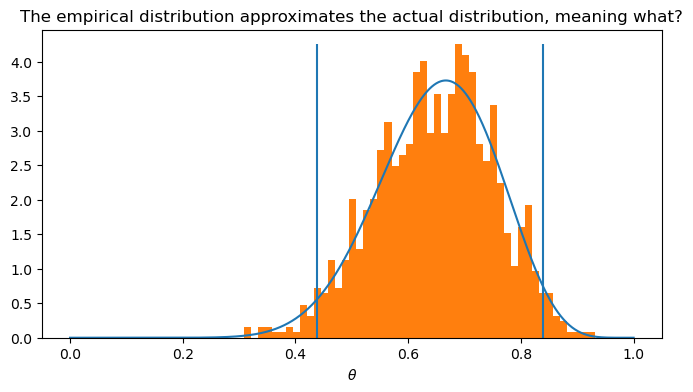

In [ ]:
plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.title("The empirical distribution approximates the actual distribution, meaning what?")
plt.plot(parameter_domain, posterior.pdf(parameter_domain));
hist = plt.hist(posterior_m, bins=50, density=True)

# Uncommenting this to see the Bayesian Credible interval
#plt.vlines([sorted(posterior_m)[int(m/40)],
#            sorted(posterior_m)[-int(m/40)]],0,hist[0].max());

5. What does the fact that the empirical distribution approximates the actual distribution allow us to do?
6. Why might this be useful?
7. How is this different than calculating probabilities from mathematical definitions of a distribution?
8. Why is Bayesian inference different from Frequentist inference?


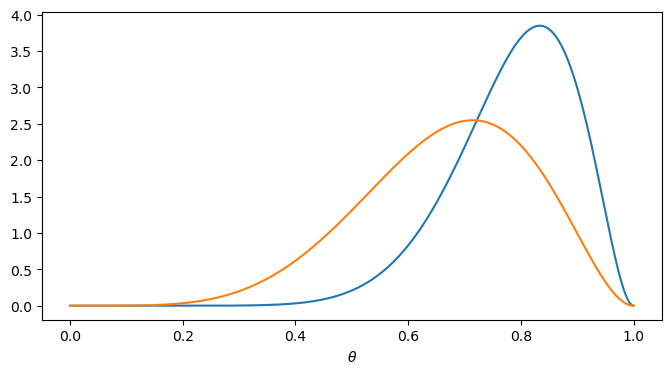

In [ ]:
# Let's compare two distributions...

alpha,beta = 3,1; parameter_domain = np.linspace(0,1,1000)
prior = stats.beta(a=alpha,b=beta)

n1,x1 = 10,8
posterior1 = stats.beta(a=alpha+x1,b=beta+n1-x1)
n2,x2 = 5,3
posterior2 = stats.beta(a=alpha+x2,b=beta+n2-x2)

plt.figure(figsize=(8,4)); plt.xlabel('$\\theta$')
plt.plot(parameter_domain, posterior1.pdf(parameter_domain))
plt.plot(parameter_domain, posterior2.pdf(parameter_domain));


9. What is $\Pr(\theta_1<\theta_2|x1,x2) = \int\int 1_{\theta_1 < \theta_2}(\theta_1, \theta_2) p(\theta_1|x1)p(\theta_2|x2) d \theta_1 d \theta_2$?
10. What is the chance that a single sample $\theta_1^{(m)}$ is less than another single sample $\theta_2^{(m)}$?
11. What is the density $f(\theta_1 \div \theta_2)$?

# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**



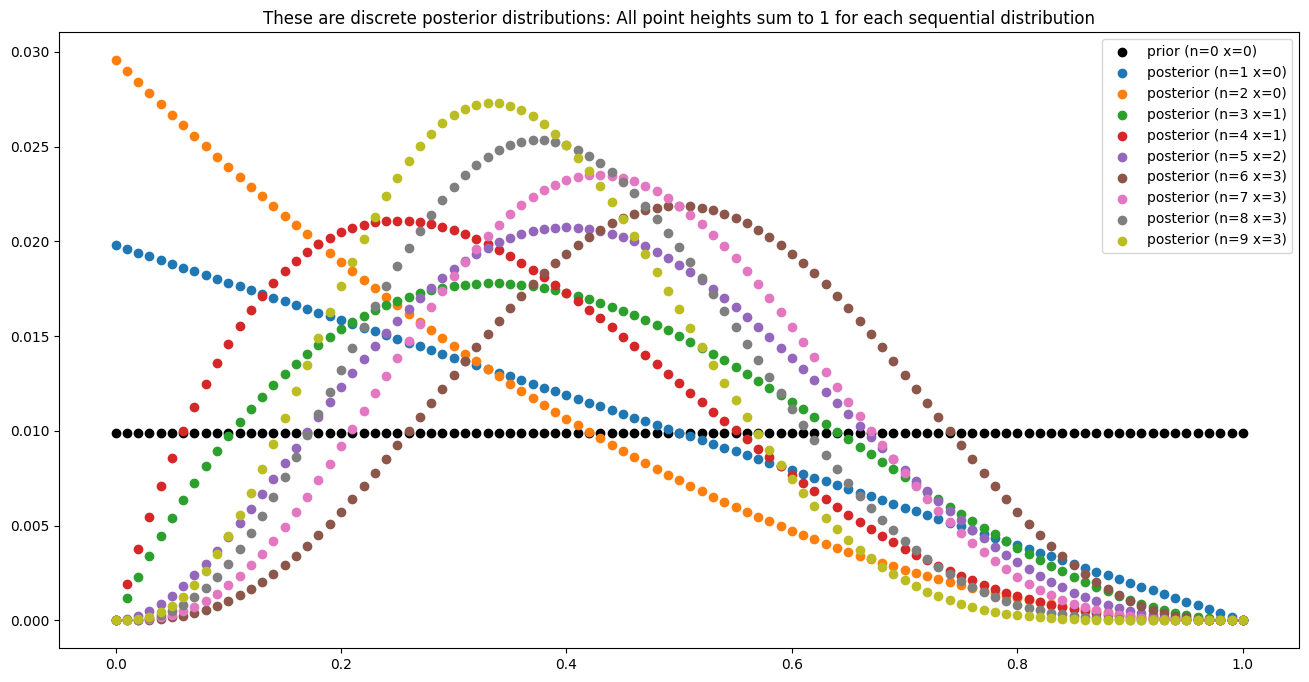

In [ ]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    unnormalized_posterior = prior * (parameter_domain ** observation) * ((1 - parameter_domain) ** (1 - observation))

    posterior = unnormalized_posterior / unnormalized_posterior.sum()
    # or do updates in a truly sequential manner using Bernoulli
    prior = posterior  # for each Bernoulli observation update

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*




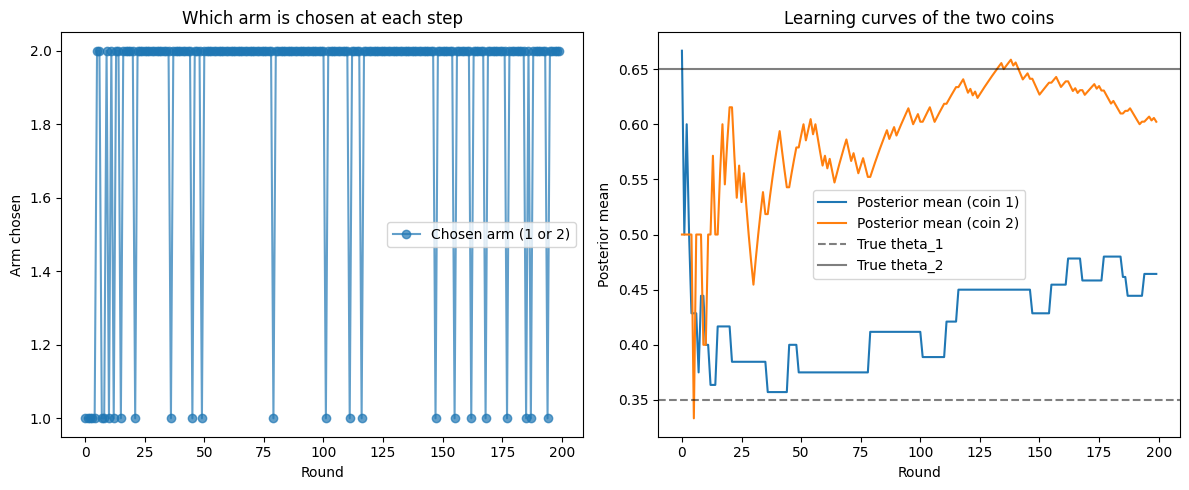

In [ ]:
# Q2

import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation environment setup
# True success probabilities of the two coins
theta_true_1 = 0.35
theta_true_2 = 0.65

# Total number of rounds
T = 200

# 2. Beta prior initialization (start with Beta(1, 1) for each coin)
alpha1, beta1 = 1.0, 1.0
alpha2, beta2 = 1.0, 1.0

# For visualization: record chosen arm, rewards, and posterior means
chosen_arm = []
rewards = []
posterior_mean_1 = []
posterior_mean_2 = []

# 3. Helper function to estimate P(theta1 > theta2) by Monte Carlo
def prob_theta1_greater_than_theta2(a1, b1, a2, b2, n_samples=2000):
    s1 = np.random.beta(a1, b1, n_samples)
    s2 = np.random.beta(a2, b2, n_samples)
    return np.mean(s1 > s2)

# 4. Main loop: at each round, decide which coin to flip, simulate outcome, update posteriors
for t in range(T):
    # Compute probability that coin 1's success rate is higher than coin 2's
    p_1_better = prob_theta1_greater_than_theta2(alpha1, beta1, alpha2, beta2)

    # Choose which coin to flip based on that probability
    if np.random.rand() < p_1_better:
        arm = 1
        reward = 1 if np.random.rand() < theta_true_1 else 0
        # Update Beta posterior for coin 1
        alpha1 += reward
        beta1 += (1 - reward)
    else:
        arm = 2
        reward = 1 if np.random.rand() < theta_true_2 else 0
        # Update Beta posterior for coin 2
        alpha2 += reward
        beta2 += (1 - reward)

    chosen_arm.append(arm)
    rewards.append(reward)
    # Record current posterior mean for each coin
    posterior_mean_1.append(alpha1 / (alpha1 + beta1))
    posterior_mean_2.append(alpha2 / (alpha2 + beta2))

# 5. Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# (a) Which arm is chosen at each step
ax1.plot(chosen_arm, 'o-', alpha=0.7, label='Chosen arm (1 or 2)')
ax1.set_xlabel('Round')
ax1.set_ylabel('Arm chosen')
ax1.set_title('Which arm is chosen at each step')
ax1.legend()

# (b) Posterior means of the two coins over time
ax2.plot(posterior_mean_1, label='Posterior mean (coin 1)')
ax2.plot(posterior_mean_2, label='Posterior mean (coin 2)')
ax2.axhline(y=theta_true_1, color='k', linestyle='--', alpha=0.5, label='True theta_1')
ax2.axhline(y=theta_true_2, color='k', linestyle='-', alpha=0.5, label='True theta_2')
ax2.set_xlabel('Round')
ax2.set_ylabel('Posterior mean')
ax2.set_title('Learning curves of the two coins')
ax2.legend()

plt.tight_layout()
plt.show()


### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

The choice of which approach is more appropriate in practice depends on whether there is perceived connection or resource competition between the three entities. If the chance of success for each entity is truly independent, the independent Beta-Binomial approach is typically more intuitive and simpler. If the three versions, on the other hand, are mutually exclusive and collectively exhaustive categories, a Dirichlet-Multinomial model may be more appropriate, as it accounts for how the three probabilities are related or compete within one shared single probability distribution.


#### **Real-World AB Testing Example**

Consider a scenario in which an online retailer is testing three distinct homepage layouts (A, B, and C) to see which yields the highest purchase or “add to cart” rate. The retailer wants to “learn” which layout is best while minimizing lost revenue from showing subpar layouts for too long.

- **Setting**  
  - Each time a user arrives at the website, the algorithm decides which layout (A, B, or C) to serve.  
  - The user either performs a “success” (e.g., adds an item to cart) or does nothing (“failure”).

- **Bayesian Multi-Armed Bandit Approach**  
  - **Independent Beta-Binomial**  
    - Maintain three Beta distributions, one for each layout. Use Thompson Sampling: sample a candidate ${\theta}_A$ from layout A's posterior, ${\theta}_B$ from B's, and ${\theta}_C$ from C's. Whichever has the highest sampled value gets shown to the next user.  
    - Update that layout's posterior after observing success/failure.  
    - Over time, more traffic is allocated to the layout with the highest observed performance, while still occasionally exploring the other layouts to remain confident in which is truly best.

- **Exploration vs. Exploitation**  
  - This bandit method balances exploring each layout enough to estimate its performance accurately and exploiting the best-performing layout to maximize overall success.  
  - As data accumulate, the layout with the genuinely highest probability of success will receive a larger proportion of impressions.

In summary, **independent Beta-Binomial** or **Dirichlet-Multinomial** both can be used for three (or more) entities with binary outcomes, but the choice depends on whether the entities are genuinely independent Bernoulli processes or components of one multinomial outcome. A real-world three-version AB test (e.g., multiple website layouts) is a perfect illustration of how Bayesian multi-armed bandits improve decision-making under uncertainty while managing the exploration-exploitation tradeoff.

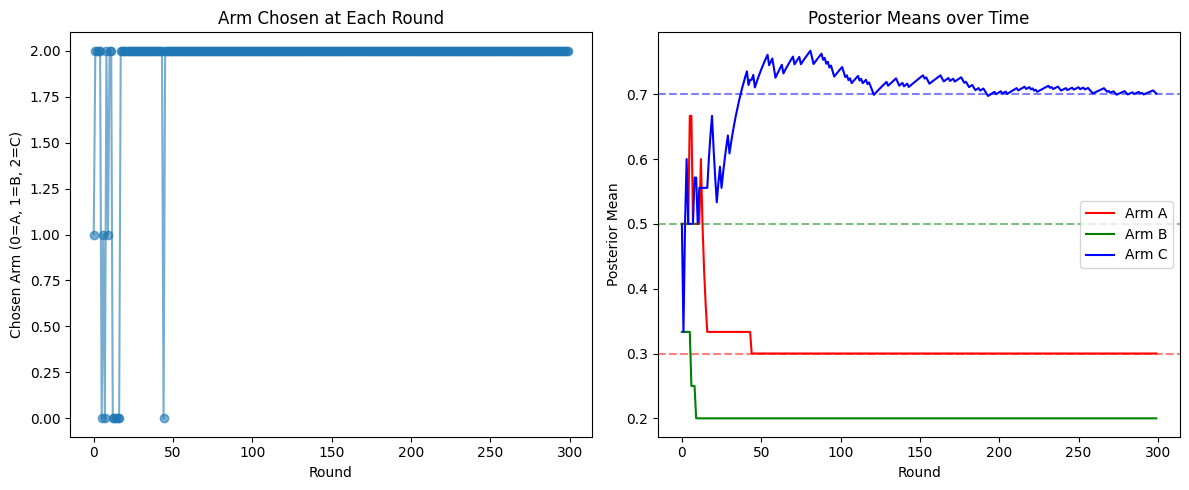

In [ ]:
# Q3 Real-World AB Testing Example

import numpy as np
import matplotlib.pyplot as plt

# True success probabilities for 3 arms
theta_true = [0.3, 0.5, 0.7]

# Number of rounds
T = 300

# Initialize Beta(1,1) for each arm
alpha = np.ones(3)
beta  = np.ones(3)

chosen_arms = []
rewards = []
posterior_means = [[] for _ in range(3)]

for t in range(T):
    # Thompson Sampling: draw one sample from each arm's Beta posterior
    samples = [np.random.beta(alpha[i], beta[i]) for i in range(3)]

    # Choose the arm with the largest sampled value
    arm = np.argmax(samples)

    # Simulate a reward from the chosen arm's true success probability
    reward = 1 if np.random.rand() < theta_true[arm] else 0

    # Update that arm's posterior
    alpha[arm] += reward
    beta[arm] += (1 - reward)

    # Bookkeeping
    chosen_arms.append(arm)
    rewards.append(reward)
    for i in range(3):
        # Posterior mean = alpha / (alpha+beta)
        posterior_means[i].append(alpha[i] / (alpha[i] + beta[i]))

# ---- Visualization ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# (1) Plot which arm was chosen over time
ax1.plot(chosen_arms, 'o-', alpha=0.6)
ax1.set_xlabel('Round')
ax1.set_ylabel('Chosen Arm (0=A, 1=B, 2=C)')
ax1.set_title('Arm Chosen at Each Round')

# (2) Plot posterior means of each arm
labels = ['A', 'B', 'C']
colors = ['red', 'green', 'blue']
for i in range(3):
    ax2.plot(posterior_means[i], color=colors[i], label=f"Arm {labels[i]}")

# Draw lines for the true success probabilities
for i, c in enumerate(colors):
    ax2.axhline(y=theta_true[i], color=c, linestyle='--', alpha=0.5)

ax2.set_xlabel('Round')
ax2.set_ylabel('Posterior Mean')
ax2.set_title('Posterior Means over Time')
ax2.legend()

plt.tight_layout()
plt.show()


## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data